##### Colab

In [ ]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import userdata
import os

os.environ["kaggle_key"] = userdata.get('kaggle_key')
os.environ["kaggle_username"] = userdata.get('kaggle_username')

In [ ]:
!kaggle datasets download -d ravidussilva/real-ai-art
! unzip "real-ai-art"

##### Local & Colab

In [1]:
#Imports
import sys
sys.path.append('/Users/viktoriiaovsianik/Documents/Uni/04_WS2024/06_ADL/Code/ADL-WS-2024')
#sys.path.append('/content/drive/MyDrive/06_TUWien/10_ADL')

from scripts.viz import display_images
from datasets.AIArtBench import AIArtbench
from datasets.dataset import Subset
from datasets.preprocessing import CustomDatasetPreprocessor
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

#### Import dataset & look what's inside

In [2]:
dataset_path = "/Users/viktoriiaovsianik/Documents/Uni/04_WS2024/06_ADL/Code/ADL-WS-2024/data"
#dataset_path = "/content/Real_AI_SD_LD_Dataset"

In [3]:
# Process Data to print some images
preprocessor = CustomDatasetPreprocessor(dataset_path)
preprocessor.preprocess(fraction=0.2) #get only a fraction of data

# Get dataset splits
train_data, validation_data, test_data = preprocessor.get_splits()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


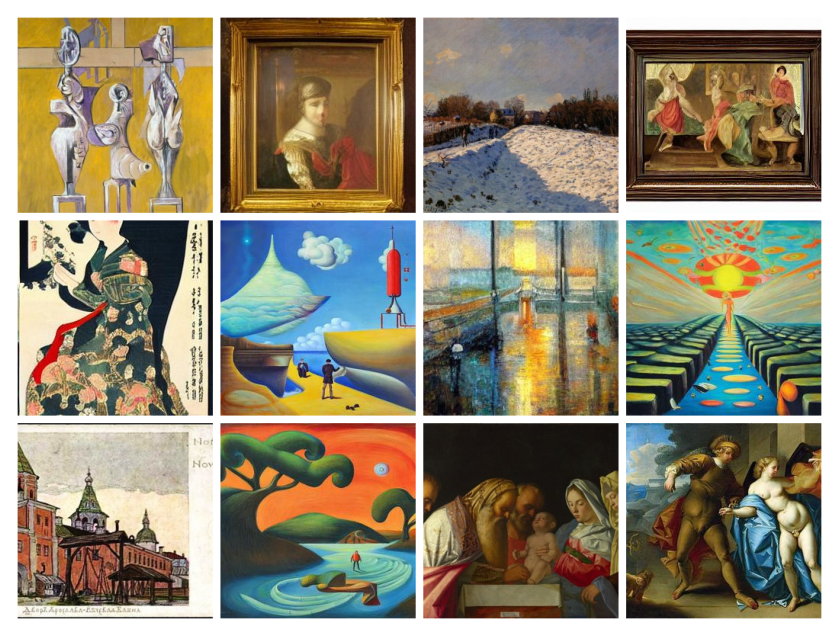

Class Labels:
human_surrealism
AI_renaissance
human_impressionism
AI_art_nouveau
AI_ukiyo-e
AI_surrealism
AI_post_impressionism
AI_surrealism
human_art_nouveau
AI_surrealism
human_renaissance
AI_baroque


In [6]:
# Print images from train dataset + check how different transformations work
train_transform = transforms.Compose([
        transforms.Resize(size=(256, 256)),
        transforms.ToTensor()
    ])

# Prepare the training dataset and DataLoader
train_dataset = AIArtbench(dataframe=train_data, subset=Subset.TRAINING, transform=train_transform)
# Extract images
train_data_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, )
# Get unique class names
classes = train_dataset.get_classes()
# Display a few images from the training data
display_images(data_loader=train_data_loader, classes=classes, num_images=12, save_path="train_images_grid.png")